In [ ]:
# This program was written by Radha Mahalingam (3-19-19)
# Python Matlibplot project

# This project analyses the data provided by the ride sharing company to offer data-backed guidance on new 
# opportunities for market differentiation. The data provided includes complete recordset of historic rides and about
# every active drivers, including details like city, driver count,individual fares, and city type.

# Through this program, a bubble plot and couple of pie charts have been built.

# The Bubble Plot showcases the the relationship between following four key variables:

    # Average Fare ($) Per City
    # Total Number of Rides Per City
    # Total Number of Drivers Per City
    # City Type (Urban, Suburban, Rural)

# In addition,  three pie charts are created to implement the following objectives:

    # % of Total Fares by City Type
    # % of Total Rides by City Type
    # % of Total Drivers by City Type

# This project uses OS, Pandas, numpy, Matplotlib libraries and the Jupyter Notebook

# This project also makes sure the data is cleaned before being put to use to analyze and plot

# Proper labeling of all the plots are done, including aspects like: Plot Titles, Axes Labels, Legend Labels, 
# Wedge Percentages, and Wedge Labels.
# Proper care has been taken to make the plots to consider the following aesthetics at a minimum
    # Pyber color scheme (Gold, SkyBlue, and Coral) are followed in producing your plot and pie charts.
    # When making the Bubble Plot, experimented with effects like `alpha`, `edgecolor`, and `linewidths`.
    # When making the Pie Charts, experimented with effects like `shadow`, `startangle`, and `explosion`.


# Based on the data visualization, the following three observable trends are clearly documented based on the plots 
# and analysis.

#Based on the data visualization, the following three key trends are clearly observed based on the plots and analysis.

#Both the Bubble chart and Pie charts provide great insights on (1)Drivers utilization (2) Drivers Throughput/
#productivity and (3) Ride Profitability (Fare per ride) as it relates to the three city types - Urban, Suburban 
#and Rural. These insights will help to focus on marketing the ride sharing services, incentivizing the driver 
#partners and improving customer satisfaction.  One of the input that will be vital to further study / understand 
#the trend will be the wait time for the service by the customers in those three city types.  Let us discuss the 
#three observable trends and related insights:

#1.  Drivers Utilization:  More drivers are in the Urban areas compared to Suburban and Rural areas.  Rural area 
#represents really a smaller percentage of drivers (2.6%) compared to larger percentage (80.9%) in Urban areas 
#followed by 15.5% in Suburban areas.  This may be due to the volume of demands for ride services in the three city 
#types.  However, when you look at rides per driver, it shows there are more drivers in Urban areas compared to 
#ride demands, with rural area project less drivers compared to ride demands in the rural areas. On average, 
#drivers in urban area get 0.68 rides per driver (i.e. some drivers may not get a ride in a typical day), 
#where as 1.6 rides per driver in rural areas with Suburban coming in between.  This shows that additional 
#incentives and marketing need to be rolled out to attract ride passengers in Urban areas and attract the driver 
#partners in Suburban and rural areas.


#2.  Drivers Throughput / Productivity: Urban Driver partners on average get $16.6 fare per ride compared to $55.5 
#per ride for the Rural Driver partners, with Suburban driver coming in between ($39.5).  This shows the ride 
#sharing faces intense competition for the market share in urban areas where as the competition is relatively modest 
#in Rural and suburban areas. This also provides correlation to the fact that there are more drivers in the urban 
#areas which increases the imbalance between supply and demand.

#3. Profitability (Fare per ride) :  On average, rural area rides provide better fare per ride ratio compared to 
#Urban areas.  Each ride in the rural area fetches $34.62 per ride compared to $24.53 per ride in Urban area, 
#with Suburban coming in the middle ($30.87).  This could be due to the fact that the rides in urban areas are 
#for short distances compared to Rural areas.  It could also be due to heavy competition, which lowers the ride 
#price as part of variable pricing.

#All the above three trends are appropriately visible in both bubble plot and pie charts. The bubble plot shows that
#there are more drivers from the urban areas concentracted on the rides which fetches low average fare per ride. On 
#the other hand, there are very small percentage of drivers in the rural areas, concentrated on the rides which 
#fetches higher average fare per ride, with Suburban coming just in the middle.

In [1]:
%matplotlib inline
#%matplotlib notebook

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File path to write the plot images

image_dir_path = "./images/"
directory = os.path.dirname(image_dir_path)

# File to Load 

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_ride_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview

city_ride_df.columns=['city','date', 'fare', 'ride_id', 'driver_count','City Type']
city_ride_df.head()

,city,date,fare,ride_id,driver_count,City Type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [16]:
# Using the merged file, the following does the 'Groupby' and 'renaming the columns' to arrive at the 
# following for each city
    # Average Fare ($) Per City
    # Total Number of Rides Per City
    # Total Number of Drivers Per City
    # City Type (Urban, Suburban, Rural)

cr_avg_fare_df= city_ride_df.groupby("city")
Bubble_chart_df = cr_avg_fare_df.mean()[["fare"]]
Bubble_chart_df["Tot Num Rides"] = cr_avg_fare_df.count()[["ride_id"]]
Bubble_chart_df = pd.merge(Bubble_chart_df, city_df, on="city")
Bubble_chart_df.columns=['City', 'Avg Fare per city', 'Tot Num Rides per city', 'Tot Num Drivers per city', 'City Type']

# Display the dataframe for preview

Bubble_chart_df.head(50)

,City,Avg Fare per city,Tot Num Rides per city,Tot Num Drivers per city,City Type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
5,Brandonfort,35.437368,19,10,Suburban
6,Carriemouth,28.314444,27,52,Urban
7,Christopherfurt,24.501852,27,41,Urban
8,Colemanland,30.894545,22,23,Suburban
9,Davidfurt,31.995882,17,23,Suburban


In [3]:
# Data cleaning
# While it may not be necessary for this project, as a best practice, the dataframe created above is inspected
# and appropriately cleaned to make sure the relevant fields for analysis and visualization are numeric

Bubble_chart_df['Avg Fare per city'] = pd.to_numeric(Bubble_chart_df['Avg Fare per city'])
Bubble_chart_df['Tot Num Rides per city'] = pd.to_numeric(Bubble_chart_df['Tot Num Rides per city'])
Bubble_chart_df['Tot Num Drivers per city'] = pd.to_numeric(Bubble_chart_df['Tot Num Drivers per city'])

# Display the dataframe for preview

Bubble_chart_df.head(10)

,City,Avg Fare per city,Tot Num Rides per city,Tot Num Drivers per city,City Type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
5,Brandonfort,35.437368,19,10,Suburban
6,Carriemouth,28.314444,27,52,Urban
7,Christopherfurt,24.501852,27,41,Urban
8,Colemanland,30.894545,22,23,Suburban
9,Davidfurt,31.995882,17,23,Suburban


# Bubble Plot of Ride Sharing Data

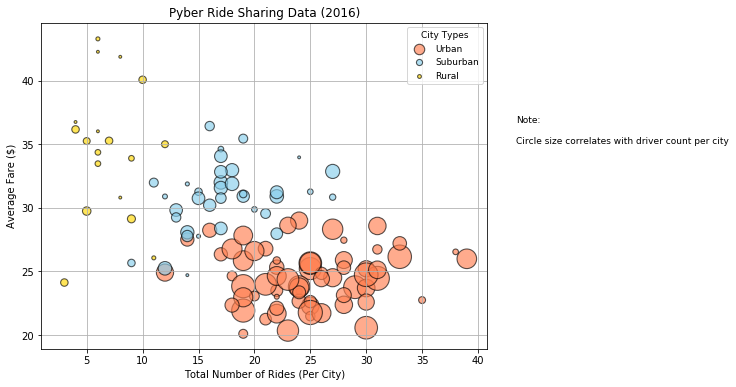

In [6]:
# Bubble Plot of Ride Sharing Data

# The following code implements the display and save of the Bubble plot

# Based on the above dataframe created, the x and y coordinates for each of the three city types 
# (Urban, Suburban and Rural) are obtained. x coordinate was represented by 'Total Number of Rides (Per City)' and 
# y coordinate was represented by 'Average Fare ($)'. Based on the x and y coordinates, the scatter plot is drawn
# for each of the three city types.  Additionally, 'Total Number Drivers per city' is used to correlate the 
#'circle size' in order to make it a bubble chart.  This also incorporates the other graph properties, legend and 
# a text label outside of plot, regarding the circle size

# Setting the figure size

plt.figure(figsize=(8,6))

# Set up the dataframe for City_Type_Legend

city_type_legend = {'Urban': 'Coral', 'Suburban': 'SkyBlue', 'Rural': 'Gold'}

# Plot the scatter plot for each city types, while incorporating the other graph properties

for cty_typ in city_type_legend:
    d = Bubble_chart_df[Bubble_chart_df['City Type'] == cty_typ]
    plt.scatter(d['Tot Num Rides per city'], d['Avg Fare per city'], 
                s = 8 * d['Tot Num Drivers per city'], 
                label = cty_typ, linewidths=1.1,
                c = city_type_legend[cty_typ], edgecolors='black', alpha=0.65)

# Create Plot title and title for x & y coordinates and City Type legend

plt.grid(True)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc="upper right", markerscale=0.6, fontsize=9, fancybox = True, title = "City Types", title_fontsize=9)

# Put the text label related to the size of the bubble outside of the Bubble plot area
textstr1 = "Note:"
textstr2 = "Circle size correlates with driver count per city"

plt.text(0.95, 0.65, textstr1, fontsize=9, transform=plt.gcf().transFigure)
plt.text(0.95, 0.6, textstr2, fontsize=9, transform=plt.gcf().transFigure)


# Create the 'images' directory in the PWD, if it is not already existing

if not os.path.exists(directory):
   os.makedirs(directory)

BImageFile =  image_dir_path + "Pyber Ride Sharing data Bubble chart.png"

# Remove the Bubble plot file from the 'images' directory, if it is already existing
if os.path.isfile(BImageFile):
  os.remove(BImageFile) 

# Save Bubble Plot Figure with the file name and path provided
plt.savefig(BImageFile)


# Show the Bubble plot
plt.show()

# Total Fares by City Type

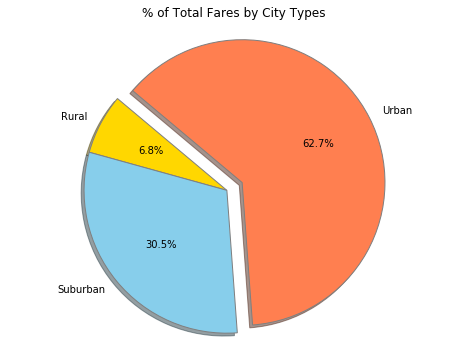

In [10]:
# Total Fares by City Type

cr_tot_fare_df= city_ride_df.groupby("City Type")
Pie_chart1_df = cr_tot_fare_df.sum()[["fare"]]

Pie_chart1_df.columns=['Tot Fare per city type']
Pie_chart1_df = Pie_chart1_df.reset_index()

#Pie_chart1_df.head()

# Setting the figure size

plt.figure(figsize=(8,6))

# Calculating Total Fares Percentage and Building a Pie Chart

colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.12)

plt.title("% of Total Fares by City Types")
plt.pie(Pie_chart1_df['Tot Fare per city type'], explode=explode, labels=Pie_chart1_df['City Type'], 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, 
        wedgeprops={'edgecolor':'gray','linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

plt.axis("equal")

# Save Figure

# Create the 'images' directory in the PWD, if it is not already existing

if not os.path.exists(directory):
   os.makedirs(directory)

P1ImageFile =  image_dir_path + "Pyber Ride Sharing data Pie chart_Tot_Fare_Cty_Type.png"

# Remove the Bubble plot file from the 'images' directory, if it is already existing
if os.path.isfile(P1ImageFile):
  os.remove(P1ImageFile) 

# Save Bubble Plot Figure with the file name and path provided
plt.savefig(P1ImageFile)

# Show Figure
plt.show()

# Total Drivers by City Type

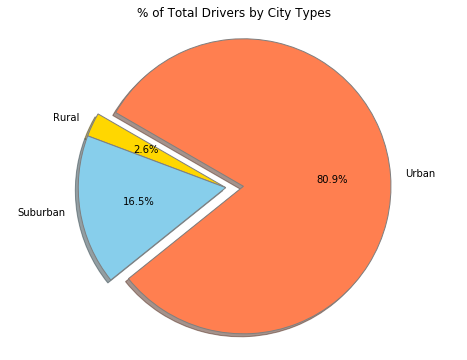

In [17]:
# Total Drivers by City Type

cr_tot_drv_df= city_ride_df.groupby("city")

P2_df = cr_tot_drv_df.mean()[["driver_count"]]
P2_df = pd.merge(P2_df, city_df, on="city")
del P2_df['driver_count_x']

P2_df=P2_df.groupby('type')
Pie_chart2_df = P2_df.sum()[["driver_count_y"]]
Pie_chart2_df = Pie_chart2_df.reset_index()
Pie_chart2_df.columns=['City Type', 'Tot Num Drivers per city type']

#Pie_chart2_df.head()

# Setting the figure size

plt.figure(figsize=(8,6))

# Calculating Driver Percentage and Building a Pie Chart

colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.12)

plt.title("% of Total Drivers by City Types")
plt.pie(Pie_chart2_df['Tot Num Drivers per city type'], explode=explode, labels=Pie_chart2_df['City Type'], 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=150, 
        wedgeprops={'edgecolor':'gray','linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

plt.axis("equal")

# Save Figure

# Create the 'images' directory in the PWD, if it is not already existing

if not os.path.exists(directory):
   os.makedirs(directory)

P2ImageFile =  image_dir_path + "Pyber Ride Sharing data Pie chart_Tot_Driver_Cty_Type.png"

# Remove the Bubble plot file from the 'images' directory, if it is already existing
if os.path.isfile(P2ImageFile):
  os.remove(P2ImageFile) 

# Save Bubble Plot Figure with the file name and path provided
plt.savefig(P2ImageFile)

# Show Figure
plt.show()


# Total Rides by City Type

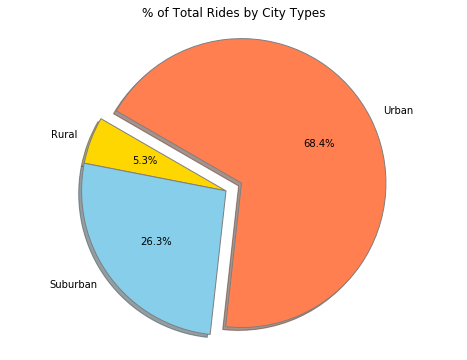

In [12]:
# Total Rides by City Type

cr_tot_rides_df = city_ride_df.groupby("city")

P3_df = cr_tot_rides_df.count()[["ride_id"]]

P3_df = pd.merge(P3_df, city_df, on="city")
del P3_df['driver_count']

P3_df=P3_df.groupby('type')
Pie_chart3_df = P3_df.sum()[["ride_id"]]
Pie_chart3_df = Pie_chart3_df.reset_index()
Pie_chart3_df.columns=['City Type', 'Tot Num Rides per city type']

#Pie_chart3_df.head()

# Setting the figure size

plt.figure(figsize=(8,6))

# Calculating Total Rides Percentage and Building a Pie Chart

colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.12)

plt.title("% of Total Rides by City Types")
plt.pie(Pie_chart3_df['Tot Num Rides per city type'], explode=explode, labels=Pie_chart3_df['City Type'], 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=150, 
        wedgeprops={'edgecolor':'gray', 'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})

plt.axis("equal")

# Save Figure

# Create the 'images' directory in the PWD, if it is not already existing

if not os.path.exists(directory):
   os.makedirs(directory)

P3ImageFile =  image_dir_path + "Pyber Ride Sharing data Pie chart_Tot_Rides_Cty_Type.png"

# Remove the Bubble plot file from the 'images' directory, if it is already existing
if os.path.isfile(P3ImageFile):
  os.remove(P3ImageFile) 

# Save Bubble Plot Figure with the file name and path provided
plt.savefig(P3ImageFile)

# Show Figure
plt.show()



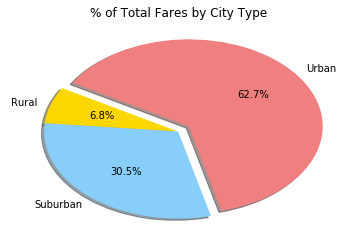

In [4]:
# Show Figure (was there in the Starter Workbook. Keeping to make the comparison)
plt.show()

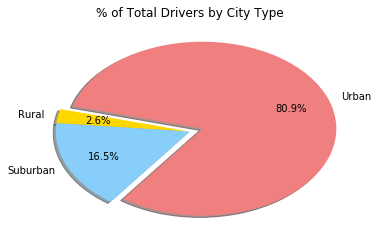

In [6]:
# Show Figure (was there in the Starter Workbook. Keeping to make the comparison)
plt.show()

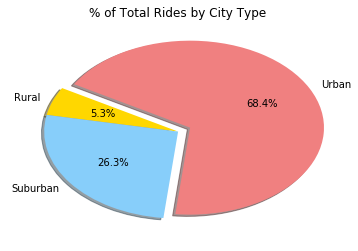

In [5]:
# Show Figure (was there in the Starter Workbook. Keeping to make the comparison)
plt.show()